# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=4b19e5882c01400da0b1459708475f66&q=London'

In [4]:
weather_data = requests.get(query_url)
weather_json = weather_data.json()
weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 294.46,
  'feels_like': 294.32,
  'temp_min': 293.1,
  'temp_max': 295.93,
  'pressure': 1005,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 5.14, 'deg': 230},
 'clouds': {'all': 75},
 'dt': 1690630387,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1690604344,
  'sunset': 1690660481},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
weather_json['coord']

{'lon': -0.1257, 'lat': 51.5085}

In [6]:
weather_json['coord']['lon']

-0.1257

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metrics"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tyukhtet
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | ahau
City not found. Skipping...
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | okap
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | hami
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | tofol
Processing Record 11 of Set 1 | ceeldheer
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | ooty
Processing Record 14 of Set 1 | una
Processing Record 15 of Set 1 | tamanrasset
Processing Record 16 of Set 1 | altamira
Processing Record 17 of Set 1 | sakakah
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | atafu village
Processing Record 22 of Set 1 | grytviken
Processing Rec

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [10]:
# Display sample data
city_data_df.head(11)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tyukhtet,56.5389,89.3011,289.46,97,100,0.93,RU,1690630461
1,edinburgh of the seven seas,-37.0676,-12.3116,287.81,88,97,11.61,SH,1690630461
2,udachny,66.4167,112.4000,299.51,25,0,2.58,RU,1690630461
3,okap,19.7578,-72.2042,300.50,75,98,1.19,HT,1690630461
4,waitangi,-43.9535,-176.5597,283.05,96,82,1.79,NZ,1690630461
5,vila velha,-20.3297,-40.2925,295.90,85,40,3.60,BR,1690630388
6,hami,42.8000,93.4500,310.44,15,87,13.10,CN,1690630461
7,qaqortoq,60.7167,-46.0333,281.57,68,98,3.35,GL,1690630461
8,tofol,5.3248,163.0078,301.71,78,9,4.81,FM,1690630461
9,ceeldheer,3.8488,47.1806,301.96,60,42,11.00,SO,1690630201


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/bolit/Python-api-Challenge/output_data/cities.csv", index_label="City_ID")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tyukhtet,56.5389,89.3011,289.46,97,100,0.93,RU,1690630461
1,edinburgh of the seven seas,-37.0676,-12.3116,287.81,88,97,11.61,SH,1690630461
2,udachny,66.4167,112.4000,299.51,25,0,2.58,RU,1690630461
3,okap,19.7578,-72.2042,300.50,75,98,1.19,HT,1690630461
4,waitangi,-43.9535,-176.5597,283.05,96,82,1.79,NZ,1690630461
...,...,...,...,...,...,...,...,...,...
577,shahpur,16.7000,76.8333,301.50,65,86,9.15,IN,1690630523
578,ruteng,-8.6136,120.4721,288.52,92,49,1.31,ID,1690630523
579,xingcheng,40.6167,120.7167,297.74,94,100,6.20,CN,1690630523
580,mata-utu,-13.2816,-176.1745,299.43,86,100,4.57,WF,1690630523


In [12]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/bolit/Python-api-Challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tyukhtet,56.5389,89.3011,289.46,97,100,0.93,RU,1690630461
1,edinburgh of the seven seas,-37.0676,-12.3116,287.81,88,97,11.61,SH,1690630461
2,udachny,66.4167,112.4000,299.51,25,0,2.58,RU,1690630461
3,okap,19.7578,-72.2042,300.50,75,98,1.19,HT,1690630461
4,waitangi,-43.9535,-176.5597,283.05,96,82,1.79,NZ,1690630461


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

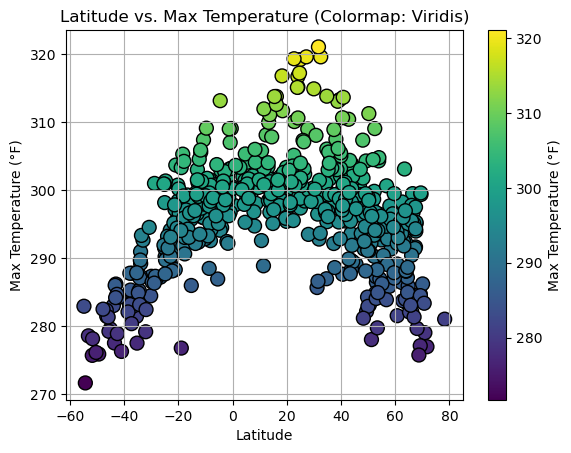

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c=city_data_df['Max Temp'], cmap='viridis', s=100, edgecolors='black')

# Incorporate graph properties 
plt.colorbar(label='Max Temperature (°F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Max Temperature (Colormap: Viridis)')
plt.grid(True)
plt.show()


plt.show()



#### Latitude Vs. Humidity

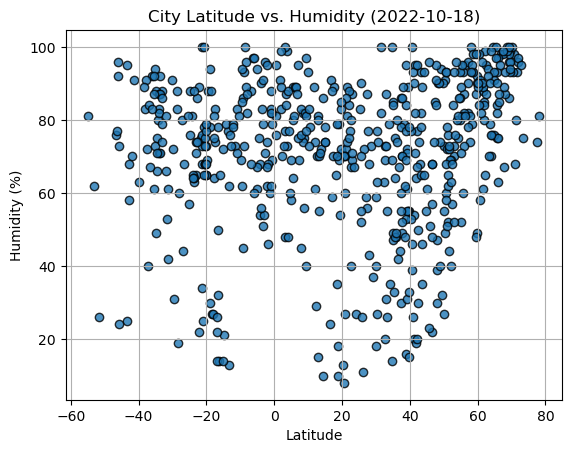

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

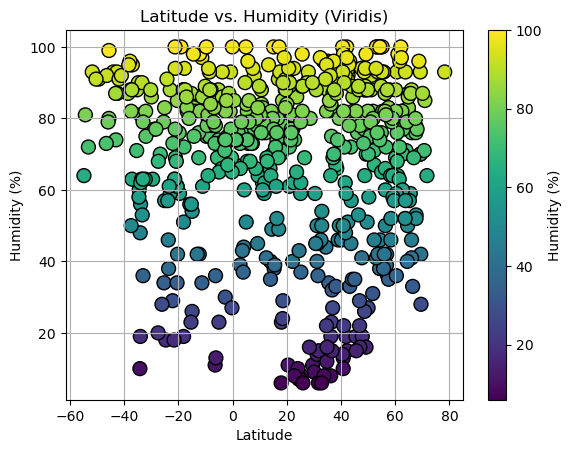

In [99]:

# Create the scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c=city_data_df['Humidity'], cmap='viridis', s=100, edgecolor='black')

# Incorporate graph properties 
plt.colorbar(label='Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (Viridis)')
plt.grid(True)
plt.show()





#### Latitude Vs. Cloudiness

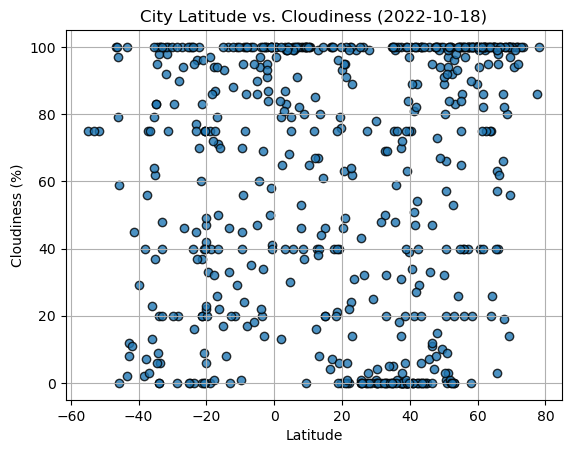

In [10]:
# Build the scatter plots for latitude vs. cloudiness


# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

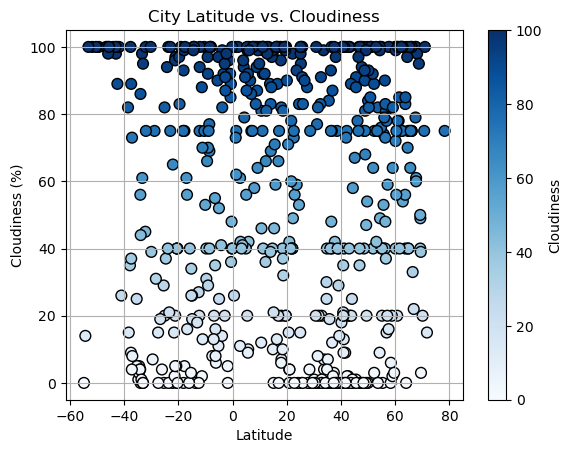

In [103]:

# Build a  scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c=city_data_df['Cloudiness'], cmap='Blues', s=60, edgecolor='black')

# Set the title and axis labels
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.colorbar(label = 'Cloudiness' )
# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

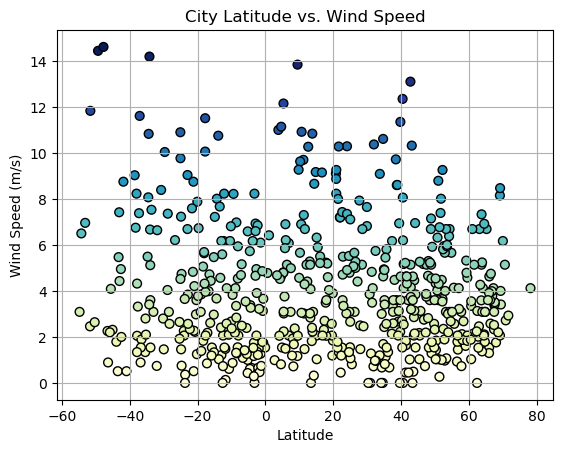

In [16]:



# Create the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c=city_data_df['Wind Speed'], cmap='YlGnBu', s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')


# Add gridlines
plt.grid(True)

# Show the plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [17]:
def create_linear_regression_plot(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept

    # Create the scatter plot and the regression line
    plt.scatter(x, y, c='blue', s=40, edgecolor='black', label='Data')
    plt.plot(x, regression_line, color='red', label='Linear Regression')

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add legend and gridlines
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display the Northern Hemisphere DataFrame
print(northern_hemi_df)

# Display sample data
northern_hemi_df.head()

                        City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                               
0                   tyukhtet  56.5389   89.3011    289.46        97   
2                    udachny  66.4167  112.4000    299.51        25   
3                       okap  19.7578  -72.2042    300.50        75   
6                       hami  42.8000   93.4500    310.44        15   
7                   qaqortoq  60.7167  -46.0333    281.57        68   
...                      ...      ...       ...       ...       ...   
573                  larache  35.1932   -6.1557    296.12        79   
574      phan rang-thap cham  11.5667  108.9833    300.83        77   
576                    trail  49.0998 -117.7022    288.14        68   
577                  shahpur  16.7000   76.8333    301.50        65   
579                xingcheng  40.6167  120.7167    297.74        94   

         Cloudiness  Wind Speed Country        Date  
City_ID               

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tyukhtet,56.5389,89.3011,289.46,97,100,0.93,RU,1690630461
2,udachny,66.4167,112.4000,299.51,25,0,2.58,RU,1690630461
3,okap,19.7578,-72.2042,300.50,75,98,1.19,HT,1690630461
6,hami,42.8000,93.4500,310.44,15,87,13.10,CN,1690630461
7,qaqortoq,60.7167,-46.0333,281.57,68,98,3.35,GL,1690630461


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display the Southern Hemisphere DataFrame
print(southern_hemi_df)

# Display sample data
southern_hemi_df.head()

                                City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
1        edinburgh of the seven seas -37.0676  -12.3116    287.81        88   
4                           waitangi -43.9535 -176.5597    283.05        96   
5                         vila velha -20.3297  -40.2925    295.90        85   
14                          altamira  -3.2033  -52.2064    299.20        94   
16                         kununurra -15.7667  128.7333    298.14        65   
...                              ...      ...       ...       ...       ...   
572                        nilopolis -22.8075  -43.4139    293.12        92   
575                        fortaleza  -3.7227  -38.5247    300.49        74   
578                           ruteng  -8.6136  120.4721    288.52        92   
580                         mata-utu -13.2816 -176.1745    299.43        86   
581                       queenstown -31.8976   26.8

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,287.81,88,97,11.61,SH,1690630461
4,waitangi,-43.9535,-176.5597,283.05,96,82,1.79,NZ,1690630461
5,vila velha,-20.3297,-40.2925,295.90,85,40,3.60,BR,1690630388
14,altamira,-3.2033,-52.2064,299.20,94,0,0.00,BR,1690630443
16,kununurra,-15.7667,128.7333,298.14,65,100,1.54,AU,1690630401


###  Temperature vs. Latitude Linear Regression Plot

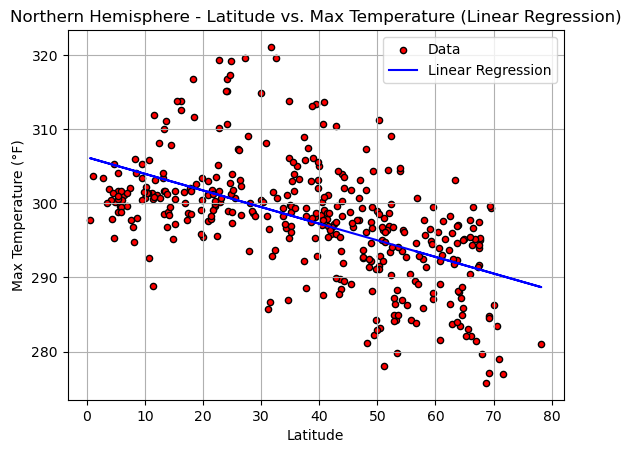

Regression Line Equation: y = -0.22x + 306.20
R-value (correlation coefficient): -0.55
P-value: 0.00
Standard Error: 0.02


In [52]:
# Linear regression on Northern Hemisphere

# Define x and y data for linear regression
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Max Temp']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regression_line = slope * x_data + intercept

# Create the scatter plot and the regression line
plt.scatter(x_data, y_data, c='red', s=20, edgecolor='black', label='Data')
plt.plot(x_data, regression_line, color='blue', label='Linear Regression')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Northern Hemisphere - Latitude vs. Max Temperature (Linear Regression)')

# Add legend and gridlines
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the regression line equation and other statistics
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-value (correlation coefficient): {r_value:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


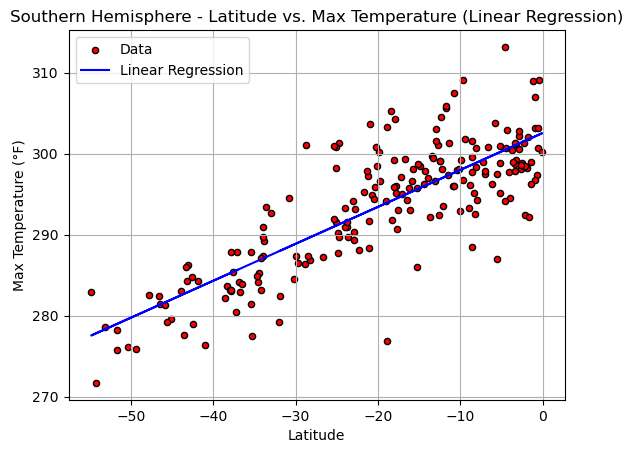

Regression Line Equation: y = 0.46x + 302.54
R-value (correlation coefficient): 0.82
P-value: 0.00
Standard Error: 0.02


In [53]:
# Linear regression on Southern Hemisphere

# Define x and y data for linear regression
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Max Temp']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regression_line = slope * x_data + intercept

# Create the scatter plot and the regression line
plt.scatter(x_data, y_data, c='red', s=20, edgecolor='black', label='Data')
plt.plot(x_data, regression_line, color='blue', label='Linear Regression')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Southern Hemisphere - Latitude vs. Max Temperature (Linear Regression)')

# Add legend and gridlines
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the regression line equation and other statistics
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-value (correlation coefficient): {r_value:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Strong possitive correlation between latitude and Temp. This means that for unit increase in latitude, 
# Temperatures rise by 46%. This is evident in our R-value of 0.82 which is indicative of a strong possitive correlation between,
# latitude and temperature. This is for the southern Hemisphere. 

#In the the northern hemisphere, we see an inverse relationship between latitude and temperature. This is evident through the strong negative ,
# correlation between latitude and temp. We see that for every unit decrease in latitude, temperatures rise by 22%, and vice-versa.

### Humidity vs. Latitude Linear Regression Plot

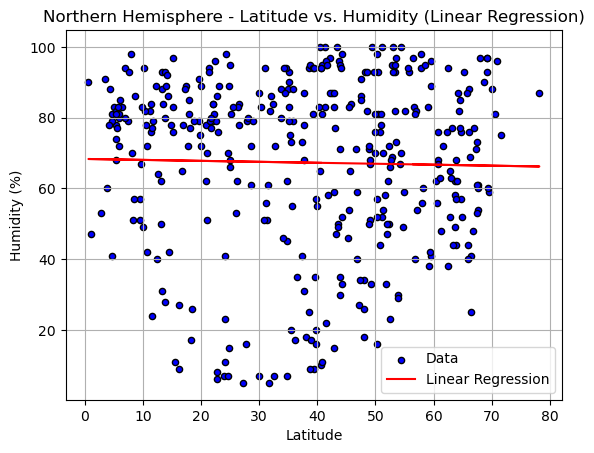

Regression Line Equation: y = -0.03x + 68.33
R-value (correlation coefficient): -0.02
P-value: 0.68
Standard Error: 0.07


In [59]:
# Northern Hemisphere

# Define x and y data for linear regression
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Humidity']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regression_line = slope * x_data + intercept

# Create the scatter plot and the regression line
plt.scatter(x_data, y_data, c='blue', s=20, edgecolor='black', label='Data')
plt.plot(x_data, regression_line, color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Latitude vs. Humidity (Linear Regression)')

# Add legend and gridlines
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the regression line equation and other statistics
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-value (correlation coefficient): {r_value:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


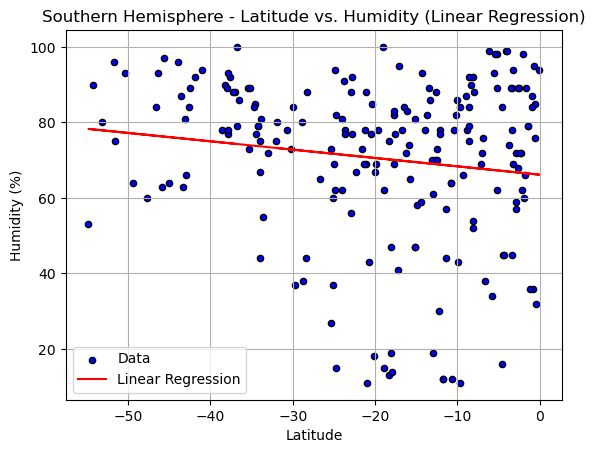

Regression Line Equation: y = -0.22x + 66.15
R-value (correlation coefficient): -0.14
P-value: 0.04
Standard Error: 0.11


In [60]:
# Southern Hemisphere

# Define x and y data for linear regression
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Humidity']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regression_line = slope * x_data + intercept

# Create the scatter plot and the regression line
plt.scatter(x_data, y_data, c='blue', s=20, edgecolor='black', label='Data')
plt.plot(x_data, regression_line, color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Latitude vs. Humidity (Linear Regression)')

# Add legend and gridlines
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the regression line equation and other statistics
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-value (correlation coefficient): {r_value:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

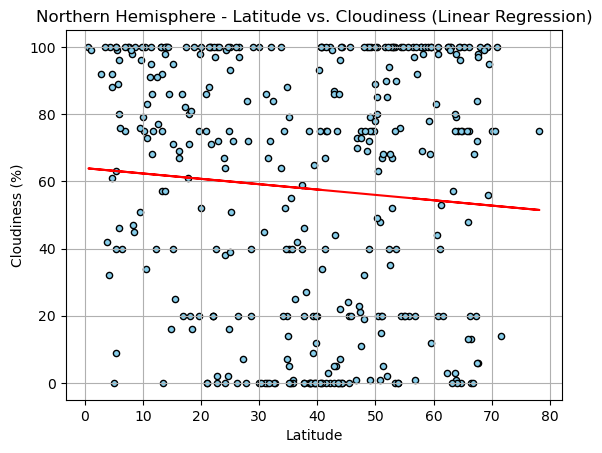

Regression Line Equation: y = -0.16x + 63.92
R-value (correlation coefficient): -0.08


In [54]:
#Northern Hemisphere

# Define x and y data for linear regression
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Cloudiness']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regression_line = slope * x_data + intercept

# Create the scatter plot and the regression line
plt.scatter(x_data, y_data, c='skyblue', s=20, edgecolor='black', label='Data')
plt.plot(x_data, regression_line, color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness (Linear Regression)')
plt.grid(True)

# Show the plot
plt.show()

# Display the regression line equation and other statistics
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-value (correlation coefficient): {r_value:.2f}")


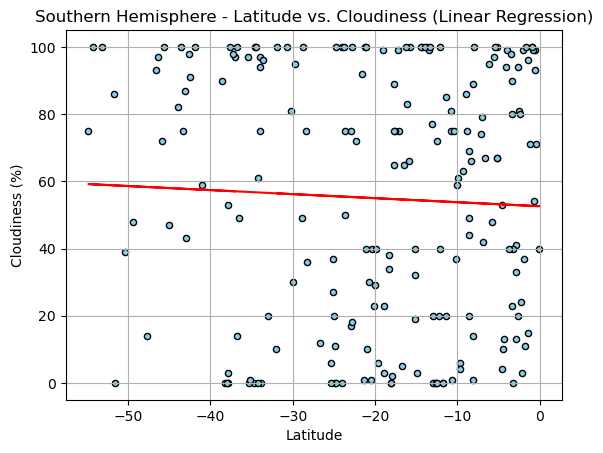

Regression Line Equation: y = -0.12x + 52.58
R-value (correlation coefficient): -0.05


In [55]:
#Southern Hemisphere

# Define x and y data for linear regression
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Cloudiness']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regression_line = slope * x_data + intercept

# Create the scatter plot and the regression line
plt.scatter(x_data, y_data, c='skyblue', s=20, edgecolor='black', label='Data')
plt.plot(x_data, regression_line, color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness (Linear Regression)')

# Add legend and gridlines
plt.grid(True)

# Show the plot
plt.show()

# Display the regression line equation and other statistics
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-value (correlation coefficient): {r_value:.2f}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

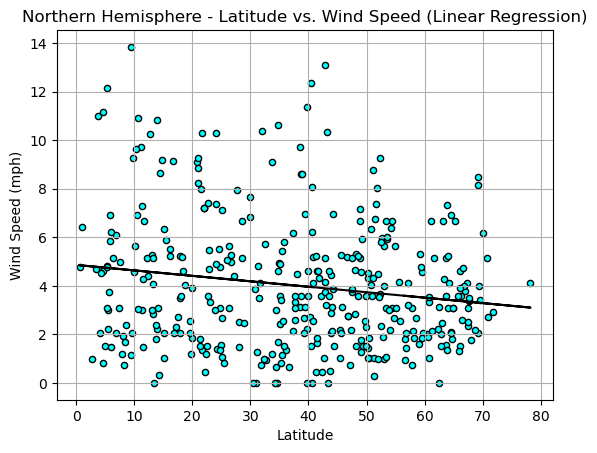

Regression Line Equation: y = -0.02x + 4.86
R-value (correlation coefficient): -0.16


In [56]:
# Northern Hemisphere

# Define x and y data for linear regression
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Wind Speed']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regression_line = slope * x_data + intercept

# Create the scatter plot and the regression line
plt.scatter(x_data, y_data, c='aqua', s=20, edgecolor='black', label='Data')
plt.plot(x_data, regression_line, color='black', label='Linear Regression')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed (Linear Regression)')
plt.grid(True)

# Show plot
plt.show()

# Display the regression line equation and other statistics
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-value (correlation coefficient): {r_value:.2f}")



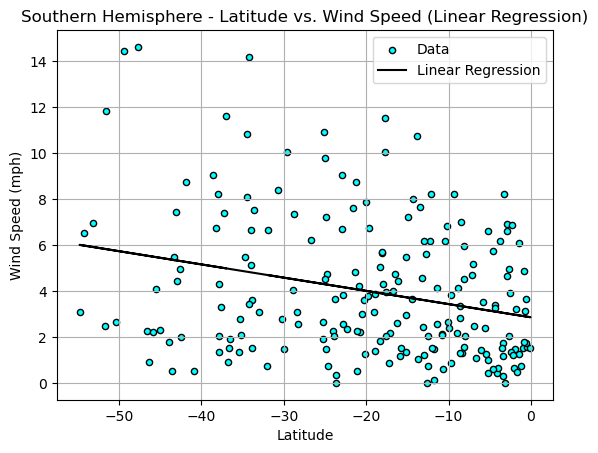

Regression Line Equation: y = -0.06x + 2.85
R-value (correlation coefficient): -0.27


In [57]:

# Southern Hemisphere

# Define x and y data for linear regression
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Wind Speed']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regression_line = slope * x_data + intercept

# Create the scatter plot and the regression line
plt.scatter(x_data, y_data, c='aqua', s=20, edgecolor='black', label='Data')
plt.plot(x_data, regression_line, color='black', label='Linear Regression')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Latitude vs. Wind Speed (Linear Regression)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Display the regression line equation and other statistics
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-value (correlation coefficient): {r_value:.2f}")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The regression line above means that wind speed decreases by 0.06 points for every unit of increase in latitude. Moreover with an R-value of -.27, 
# there exist a week negative correation between lattitude and wind speed.